# Suraj Singh Chahar 23410034 (Geological Technology) 3rd Year 

In [2]:
# This notebook serves as the code for the project for Finance club and though there is a seperate report explaining
# the methodology, inferences and workflow i have tried to put some of them here too so that the code is understandable
# along with that there are explainations for few lines of code which might seem complex.
# Workflow -> dataloading->basic data cleaning->EDA and feature engineering->Advanced EDA->Model training along with 
# handling class imbalance

import warnings                     # for removing the warnings from the notebook
warnings.filterwarnings("ignore")

In [3]:
import numpy as np                             # Importing the  basic libraries  
import pandas as pd
import matplotlib.pyplot as plt                # For plotting
import seaborn as sns 

In [4]:
df = pd.read_csv("train_dataset_final1.csv")   # Loading the dataset 
df.head()                                      # viewing the datatset

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [5]:
# checkpoint / understanding the basic structure and info

In [6]:
df.info()                                              # provides details of amount and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [7]:
# We can see that only two dtypes are present, both numerical.

In [8]:
# checkpoint / handling missing values and anamolies

<Axes: >

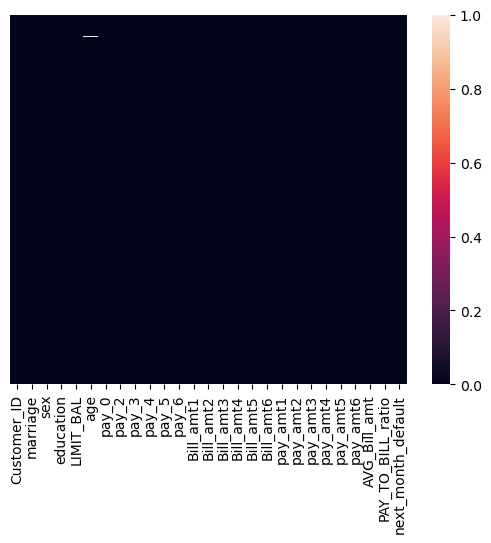

In [9]:
sns.heatmap(data=df.isnull(), yticklabels=False)          # checking for missing values using heatmap

In [10]:
df.age.isnull().sum()                           # number of rows with missing values of age 

126

In [11]:
# We see that the number of missing values in dataset are very less compared to the size of dataset(126/25247 = 0.004)
# so it would be safe to remove the rows with missing values rather than introducing biased imputations.

In [12]:
df = df.dropna()                               # dropping missing values

In [13]:
df.duplicated().sum()                          # check for duplicates in the dataset.

0

In [14]:
df.describe()                                  # gaining some basic info about numerical data present  

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,...,25121.000000,25121.000000,2.512100e+04,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000
mean,17639.804546,1.551769,0.604713,1.851996,168358.823295,35.438199,-0.043111,-0.159747,-0.190558,-0.240994,...,38826.942991,5720.009051,6.049572e+03,5277.919404,4870.517761,4897.474273,5255.708318,44893.019852,0.362015,0.190438
std,7283.872392,0.522538,0.488922,0.797132,129866.750911,9.174998,1.099224,1.174062,1.172957,1.147502,...,59200.095746,16825.574803,2.404039e+04,17756.149651,16008.327381,15767.155170,17893.903811,62878.301243,5.058260,0.392655
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11334.000000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1239.370000,999.980000,9.198500e+02,399.180000,300.120000,258.100000,129.760000,4850.330000,0.040000,0.000000
50%,17637.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17123.790000,2147.750000,2.027220e+03,1839.900000,1500.100000,1511.300000,1500.030000,21113.000000,0.090000,0.000000
75%,23947.000000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49250.340000,5032.770000,5.000200e+03,4601.220000,4015.220000,4099.810000,4018.750000,57176.330000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [15]:
# Some anomalies can be seen like presence of values like 0 in marriage and values higher than 4 in education column

In [16]:
len(df[df['marriage']==0])                    # number of anamolies in marriage column

53

In [17]:
len(df[df["education"] >4])                   # number of anamolies in education column

295

In [18]:
# For them we classify them as others i.e. all 0's of marriage will be made into 3 and 
# all the values > 4 and 0 in education will become 4 ,this will ensure that these anamolies don't interfere with other 
# classes present .

In [19]:
df.loc[(df['marriage'] == 0), "marriage"] = 3       # fixing the marriage column

In [20]:
df.loc[(df['education'] > 4) | (df['education'] == 0), "education"] = 4    # fixing the education column

In [21]:
print(("marriage",df.marriage.unique()),(" education",df.education.unique()))  # printing uniques values

('marriage', array([2, 1, 3], dtype=int64)) (' education', array([2, 1, 3, 4], dtype=int64))


In [22]:
# checkpoint / anamolies shambhali aur missing values sort kardi / EDA and feature engineering starts

In [23]:
# First we try to understand the target variable (next_month_default)

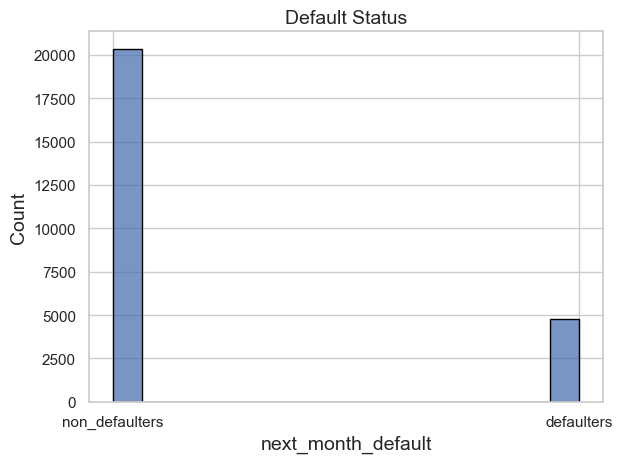

In [24]:
sns.set_theme(style="whitegrid")                                   # sets a background for presentation

sns.histplot(data=df, x='next_month_default', edgecolor='black')   # for plotting the histogram of target variable

plt.title('Default Status', fontsize=14)
plt.xlabel('next_month_default', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['non_defaulters', 'defaulters'])
plt.tight_layout()
plt.show()

In [25]:
print(((len(df[df.next_month_default == 1])))/(len(df)))

0.19043827873094224


In [26]:
# We see that defaulters are very less in number roughly the distribution is 80% non defaulters and 20% defaulters.
# This tells us that there will be a need of SMOTE further when we would train the model.

In [27]:
# Now we explore the categorical columns like marriage, sex, age and education and there correlation with defaulters.

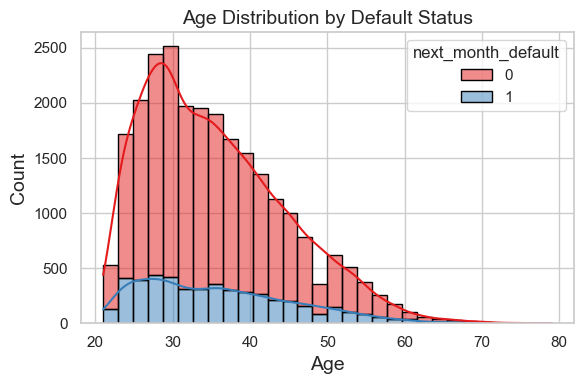

In [28]:
# age                   

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='age', hue='next_month_default', bins=30, kde = True, multiple='stack', palette='Set1', edgecolor='black')
                                                                  # kde provides a smooth curve
plt.title('Age Distribution by Default Status', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

In [29]:
# We see that most of the defaulter are present in somewhat age 25 to 40 and this range also has most of the population.
# The graph is skewed for both defaulters and non-defaulters. We can try to make bins of ages like 
# <30, 30-40, 40> as it is a strong factor determining default.(Report why these bins were  chosen)

In [30]:
def age_bin(row):          # function for making age brackets 
    if row['age'] < 30:
        return "<30"
    elif 30 <= row['age'] < 40:
        return "30-40"
    else:
        return ">40"

df['age_group'] = df.apply(age_bin, axis=1)       # applying the func to dataset

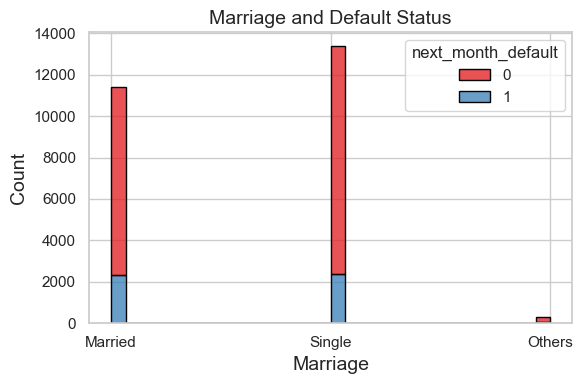

In [31]:
# marriage                    

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='marriage', hue='next_month_default', multiple='stack', palette='Set1', edgecolor='black') # individual classes are plotted

plt.title('Marriage and Default Status', fontsize=14)
plt.xlabel('Marriage', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([1, 2, 3], ['Married', 'Single', 'Others'])
plt.tight_layout()
plt.show()

In [32]:
df.marriage.groupby(df['next_month_default']).value_counts()    # for seeing the actual numbers

next_month_default  marriage
0                   2           10982
                    1            9095
                    3             260
1                   2            2392
                    1            2329
                    3              63
Name: count, dtype: int64

Text(0.5, 1.0, 'Default Rate by Marital Status')

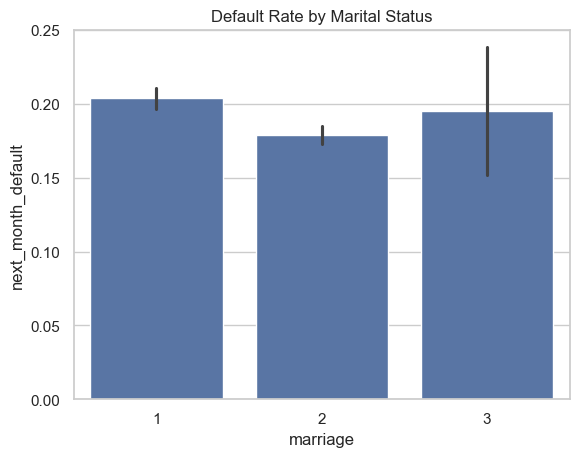

In [33]:
sns.barplot(x='marriage', y='next_month_default', data=df)      # for visualising default rates through box plot
plt.title('Default Rate by Marital Status')

In [34]:
# We see that though there is a difference in the populations of married and single people the defaulters remain 
# roughly same resulting in higher default rate for (1) in number while the other(3) category has almost neglible 
# defaulters and acts as noice to the data.

In [35]:
# Though both these parameters(age, marriage) seperately dont provide much info maybe we can get some insights combining them.

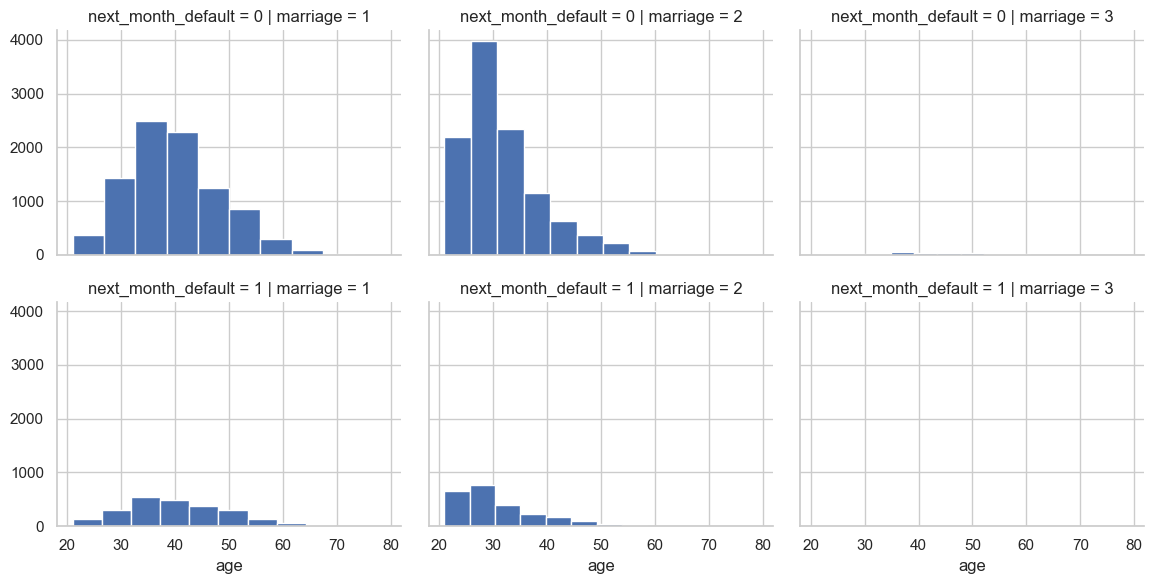

In [36]:
# To combine them we can use techniques like facetgrid of seaborn 

g = sns.FacetGrid(df, row='next_month_default', col='marriage')
g = g.map(plt.hist, 'age')                                           # selecting the variable for x axis
g.fig.set_size_inches(12, 6)
plt.show()

In [37]:
# While the other(3) category of the marriage has very less data the other categories provide valuabe insights like
# 1) single people of age group 20-30 are majorily defaulters.
# 2) married people of age group close to 40 default more than the younger couples.
# Hence marriage is a important factor affecting predication.

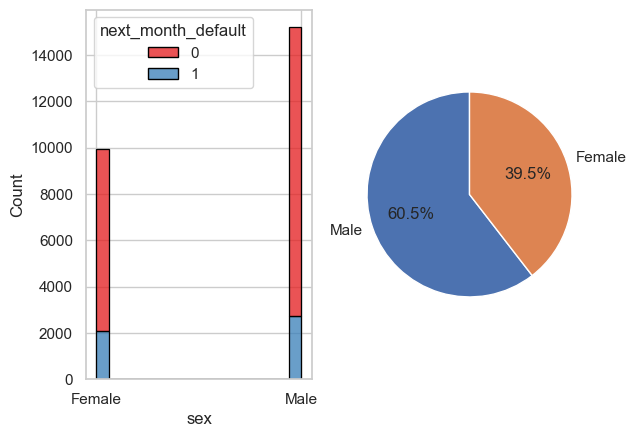

In [38]:
# We can do the same for sex 

plt.subplot(121)

sns.histplot(data=df, x='sex', hue='next_month_default', multiple='stack', palette='Set1', edgecolor='black')
plt.xticks([0, 1], ['Female', 'Male'])

labels = ['Male', 'Female']
plt.subplot(122)
plt.pie(df.sex.value_counts(), autopct='%1.1f%%', labels=labels, startangle=90)
plt.axis('equal')                                                                     # Makes the pie chart circular

plt.show()

In [39]:
df.sex.groupby(df.next_month_default).value_counts()

next_month_default  sex
0                   1      12479
                    0       7858
1                   1       2712
                    0       2072
Name: count, dtype: int64

In [40]:
# We can infer that the number of defaulters and non-defaulters both are somewhat more in males. 
# Again we can combine this with age to get more insights.

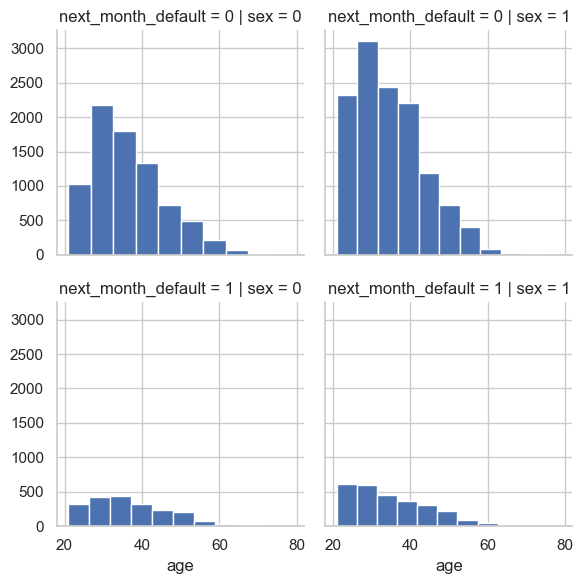

In [41]:
f = sns.FacetGrid(df, row='next_month_default', col='sex')    # this time grid with sex
f = f.map(plt.hist, 'age')
plt.show()

In [42]:
# Now can infer that that most of the males defafulting belong to the age bracket of 20-35 while the peak
# For females comes near 30-35.
# So sex can be kept for predictions in future.

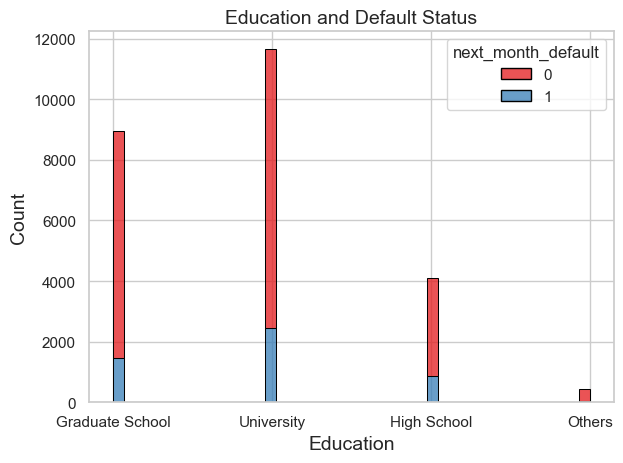

In [43]:
# now we understand the education feature and its effect on defaulting behaviour 


sns.histplot(data=df, x='education', hue='next_month_default', multiple='stack', palette='Set1',edgecolor='black' )
plt.title('Education and Default Status', fontsize=14)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([1, 2, 3, 4], ['Graduate School', 'University', 'High School', 'Others'])
plt.tight_layout()
plt.show()

In [44]:
df.education.groupby(df['next_month_default']).value_counts()

next_month_default  education
0                   2            9219
                    1            7495
                    3            3224
                    4             399
1                   2            2438
                    1            1449
                    3             872
                    4              25
Name: count, dtype: int64

In [45]:
# We see that most of the defaulters are unversity students, we can combine this with age to understand better.

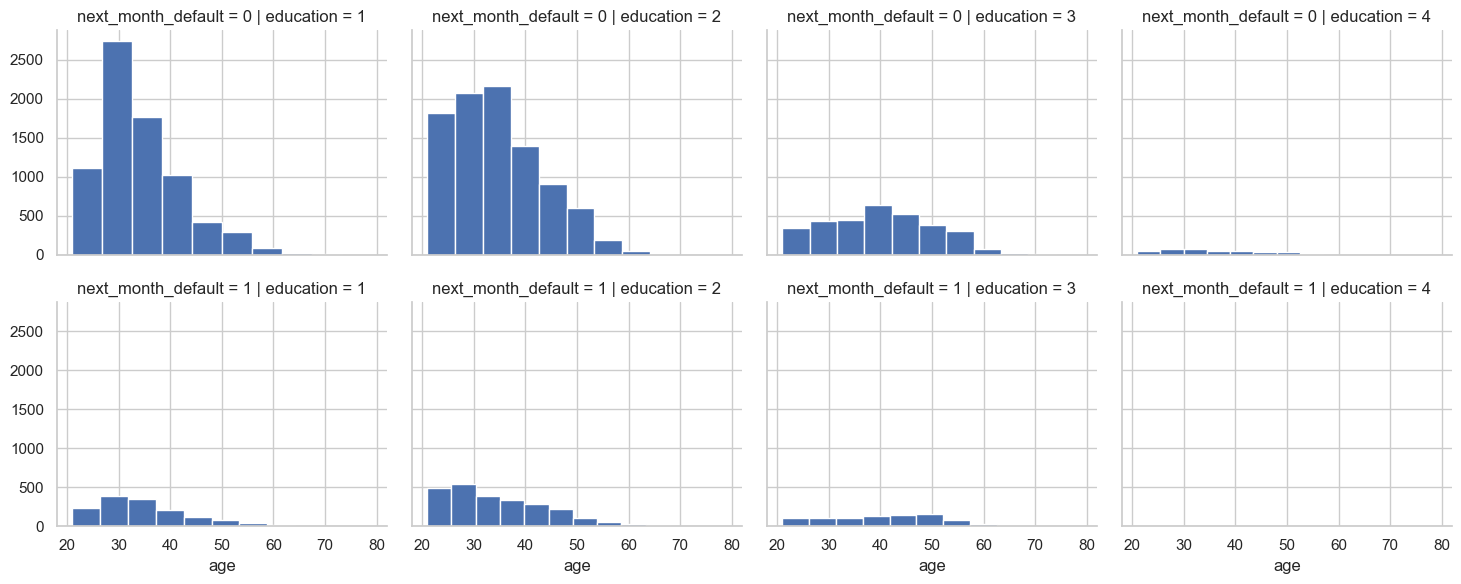

In [46]:
h = sns.FacetGrid(df, row='next_month_default', col='education')
h = h.map(plt.hist, 'age')
h.fig.set_size_inches(15, 6)
plt.show()

In [47]:
# while the inference is obvious that unveresity students will be of age around 20-30 and are mostly defaulter while 
# in case of graduate school the age is higher.

In [48]:
# Now we try to understand more numerically continuous columns like limit_bal, bill_amtm, average_bill_amount,
# pay_to_bill_ratio.

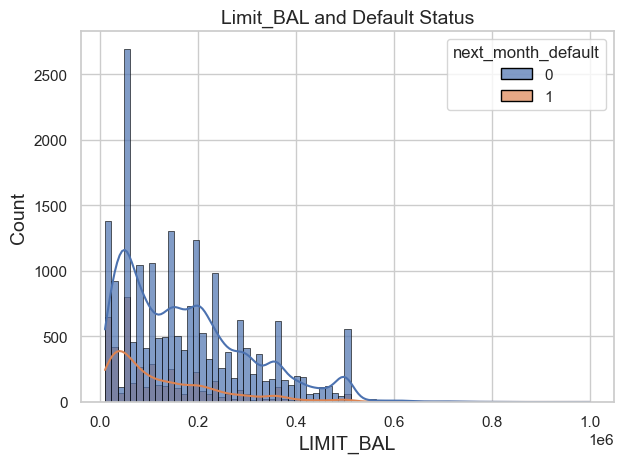

Skewness on limit_bal is :  0.9948938068300075


In [49]:
#limit_bal

from scipy.stats import skew                                                                           # for calculating skewness

sns.histplot(data=df, x='LIMIT_BAL', kde=True, hue='next_month_default',edgecolor='black', alpha=0.7)
plt.title('Limit_BAL and Default Status', fontsize=14)
plt.xlabel('LIMIT_BAL', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()
print ('Skewness on limit_bal is : ',skew(df['LIMIT_BAL']))

In [50]:
# By this distplot we observe that the limit_bal consists of skewed data.
# We have more number of clients having limiting balance between 0 to 200000 rupees.
# Both defaulters and non defaulters have somewhat lower limit_bal with non defaulters having higher bumps in the tail.

In [51]:
# Now we study the relation between the bill and the pay values as they individually will not give any good 
# interpretaions.

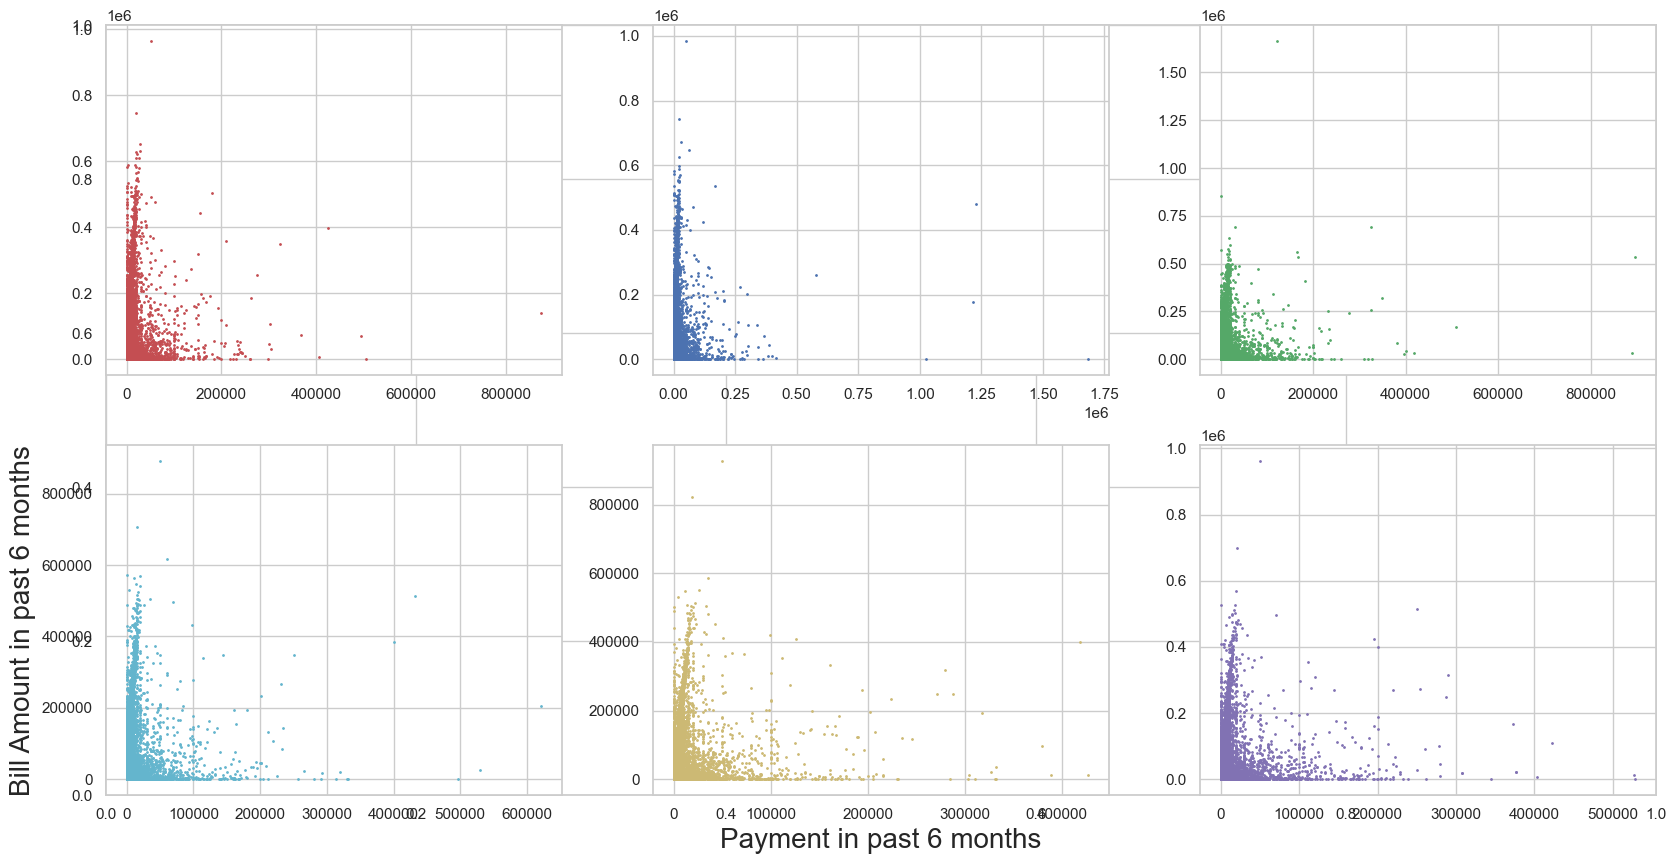

In [52]:
plt.subplots(figsize=(20,10))

ax1 = plt.subplot(231)                                          # the number (231) signifies its postion in a 2x3 grid
plt.scatter(x=df.pay_amt1, y=df.Bill_amt1, c='r', s=1)

ax2 = plt.subplot(232)
plt.scatter(x=df.pay_amt2, y=df.Bill_amt2, c='b', s=1)

ax3 = plt.subplot(233)
plt.scatter(x=df.pay_amt3, y=df.Bill_amt3, c='g', s=1)

ax4 = plt.subplot(234)
plt.scatter(x=df.pay_amt4, y=df.Bill_amt4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=20)        # acts as a y label for whole plot

ax5 = plt.subplot(235)
plt.scatter(x=df.pay_amt5, y=df.Bill_amt5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=20)            # acts as a x label for whole plot

ax6 = plt.subplot(236)
plt.scatter(x=df.pay_amt6, y=df.Bill_amt6, c='m', s=1)

plt.show()

In [53]:
# We can infer that the points are somewhat skewed towards bill_amt indicating that there is higher amount
# of population for whom the bill amount is high but payment done against the same is very low.

In [54]:
# To get a better understanding of the pay and billing amount studying the PAY_to_BILL ratio is crucial.

<Axes: xlabel='PAY_TO_BILL_ratio', ylabel='Count'>

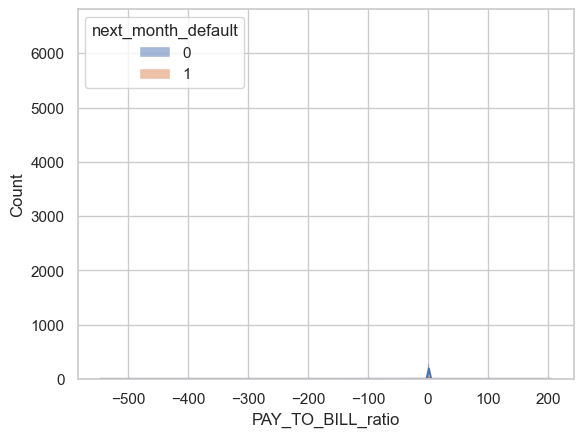

In [55]:
sns.histplot(data=df, x='PAY_TO_BILL_ratio', kde=True, hue='next_month_default')

In [56]:
# We see that due to presence of outliers the graph is not very informative so we can use describe and boxplots to get 
# a better idea .

In [57]:
df.PAY_TO_BILL_ratio.describe()

count    25121.000000
mean         0.362015
std          5.058260
min       -546.930000
25%          0.040000
50%          0.090000
75%          0.590000
max        205.380000
Name: PAY_TO_BILL_ratio, dtype: float64

<Axes: ylabel='PAY_TO_BILL_ratio'>

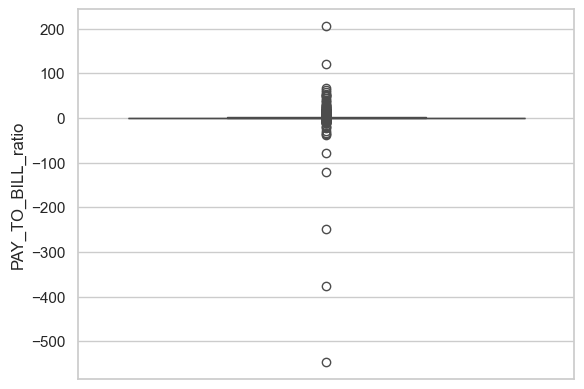

In [58]:
sns.boxplot(df.PAY_TO_BILL_ratio)

In [59]:
# We see that the mean remains 0.36 roughly indicating that payments somewhat fall behind the bill amounts.
# Scaling will be required in order to use this as a parameter.

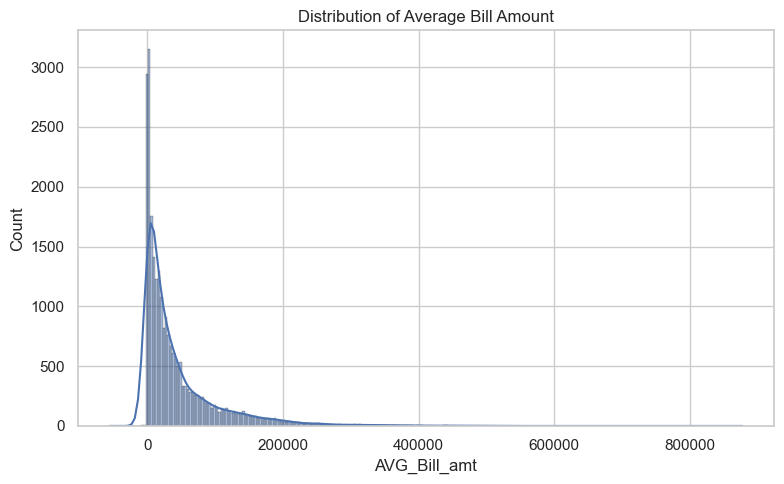

In [60]:
# Lastly the avg_bill_amt column can be explored 

plt.figure(figsize=(8, 5))

sns.histplot(df['AVG_Bill_amt'], kde=True, edgecolor='black')
plt.title('Distribution of Average Bill Amount')
plt.xlabel('AVG_Bill_amt')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [61]:
# We see that this is also skewed like limit_bal. We can make a boxplot to understand better.

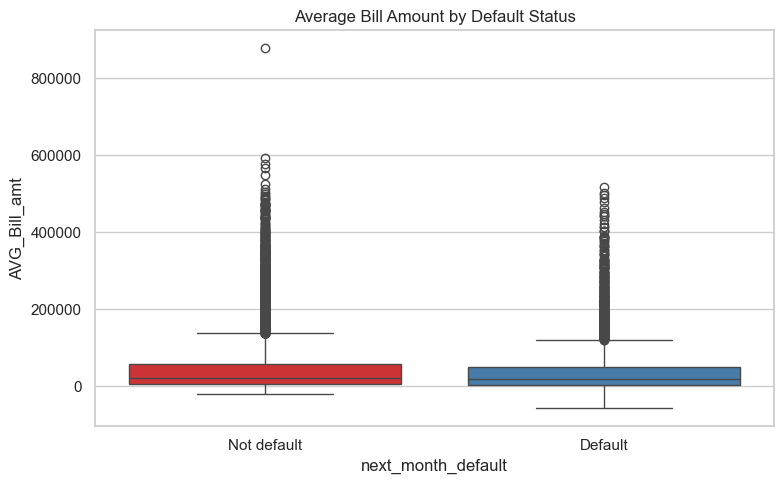

In [62]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='next_month_default', y='AVG_Bill_amt', data=df, palette='Set1')
plt.title('Average Bill Amount by Default Status')
plt.xlabel('next_month_default')
plt.xticks([0, 1], ['Not default','Default'])
plt.ylabel('AVG_Bill_amt')
plt.tight_layout()
plt.show()

In [63]:
# We see that median for non defaulters is somewhat higher than defaulters and most of the regions of both overlap.

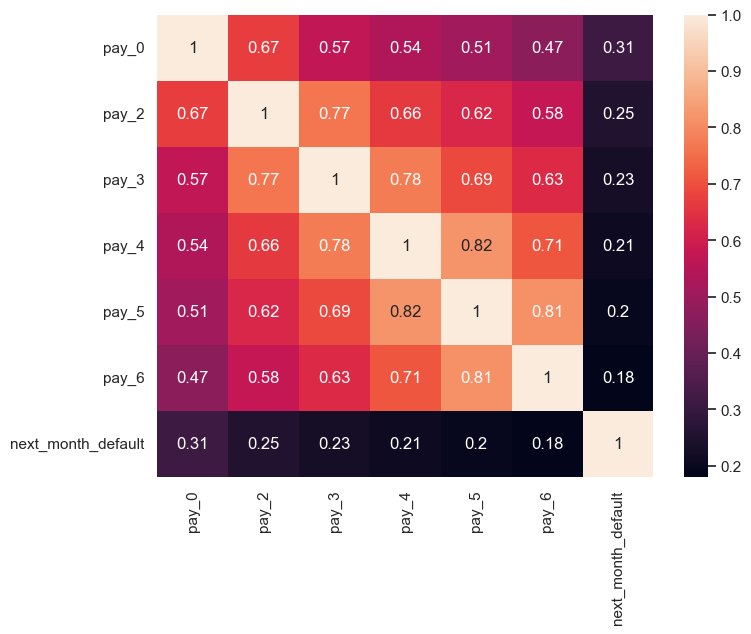

In [64]:
# Now for our last features pay_m, we can use correlation matrix for understanding their relatioin with defaulting.

df_for_corr = df[['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','next_month_default']] # pay_1 is missing from the dataset
                                                                                         # so i had to write this manually.
plt.subplots(figsize=(8,6))                                                              # this is also seen in test set that why
sns.heatmap(df_for_corr.corr(), annot=True)                                              # i didn't change this.
plt.show()

In [65]:
# We see that though pay_m are very much interrelated ,next_month_default is very less affected ,the effect dying
# after pay_2 this tells us that pay_m(m 3 to 6) can be neglected for prediction but removing them solely based on
# corr martrix would be wrong so instead we can use  PCA for dimensionality reducation if the performance is reduced .

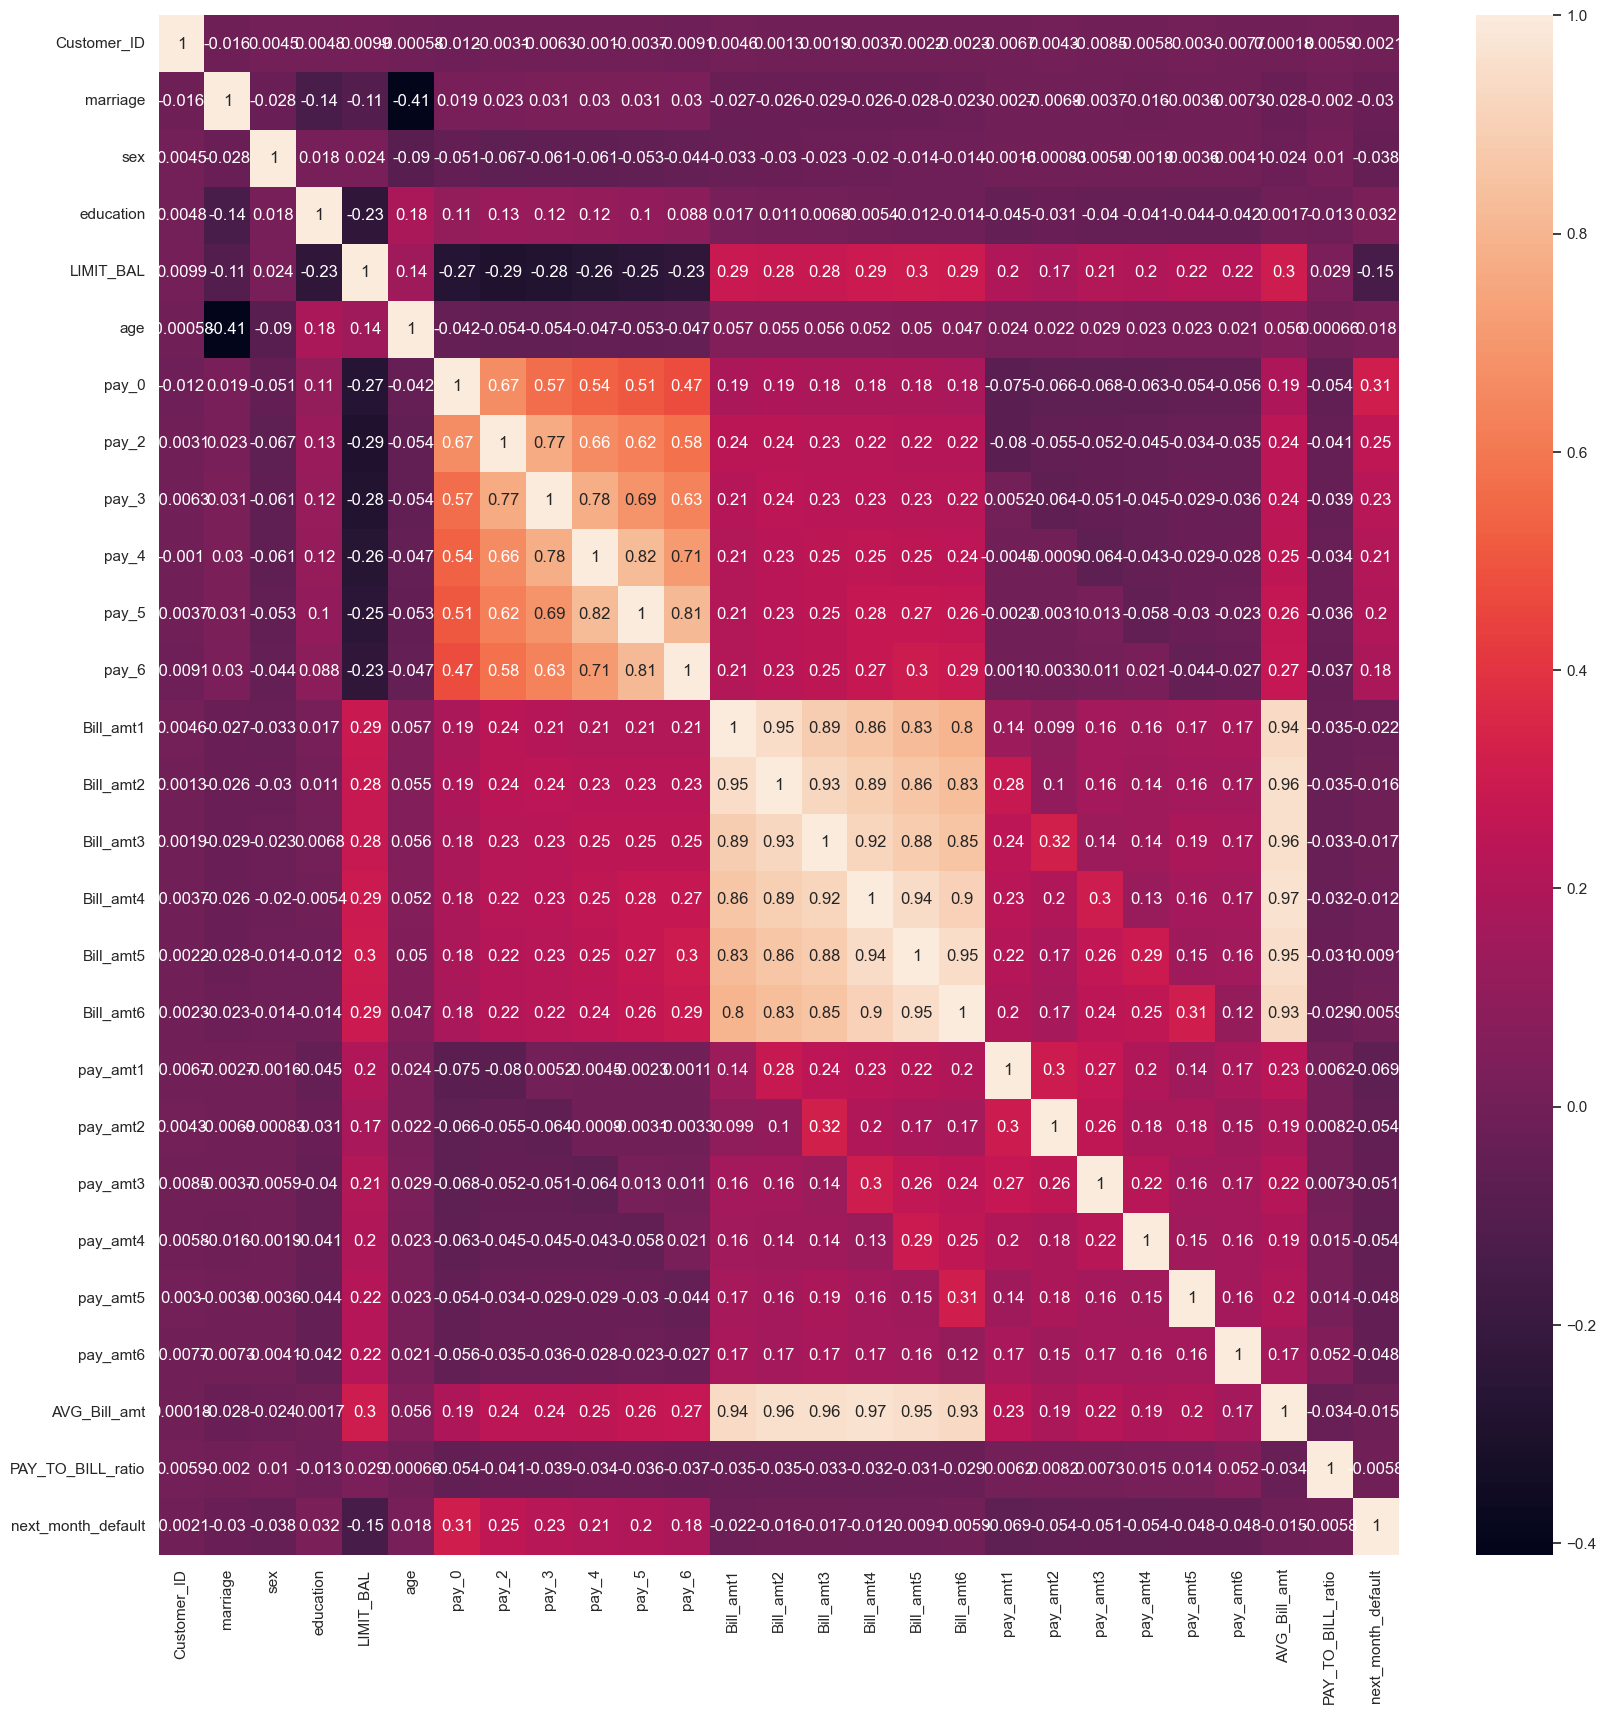

In [66]:
# but before using PCA we should check for multicollinearity in the whole dataset.

plt.subplots(figsize=(20,20))
sns.heatmap(df.drop(['age_group'],axis=1).corr(), annot=True)
plt.show()

In [67]:
# Though pay_m have lower corr score but is still higher compared to other features, removing it would mean to scrap the 
# very predicitive features so we will not go for dimensionality reduction as all pay_m values are important but we can surely 
# check for overlap in PCA components for getting a idea how complex is to sepearate teh defaulters from non defaulters.

In [68]:
# VIF number gives a idea about the collinearity in the dataset we can calculate it with the help of statsmodel.stats lib

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X_temp = df.select_dtypes(include=['number']).drop('next_month_default', axis=1)  
X_temp = add_constant(X_temp)                                                              # adds intercept

vif = pd.DataFrame()                                                            
vif["feature"] = X_temp.columns
vif["VIF"] = [variance_inflation_factor(X_temp.values, i) for i in range(X_temp.shape[1])] # creates a series of VIF values

print(vif)

              feature          VIF
0               const    58.155685
1         Customer_ID     1.001379
2            marriage     1.224117
3                 sex     1.023707
4           education     1.137584
5           LIMIT_BAL     1.560304
6                 age     1.277154
7               pay_0     1.898579
8               pay_2     3.170345
9               pay_3     3.635328
10              pay_4     4.238668
11              pay_5     4.670172
12              pay_6     3.194182
13          Bill_amt1   325.522549
14          Bill_amt2   320.437934
15          Bill_amt3   292.992461
16          Bill_amt4   258.622842
17          Bill_amt5   241.804284
18          Bill_amt6   215.872203
19           pay_amt1     1.719684
20           pay_amt2     2.333668
21           pay_amt3     1.767541
22           pay_amt4     1.684441
23           pay_amt5     1.702687
24           pay_amt6     1.172175
25       AVG_Bill_amt  8267.042946
26  PAY_TO_BILL_ratio     1.007332


In [69]:
# We see that most of the dataset has very low to moderate collinearity except for bill_amts, so if in future we get low
# score we can remove few of the bill_amts like 4,5,6
# AVG_BILL_amt's high VIF is justified as it is derived from the Bill_amt columns.

In [70]:
# checkpoint/ Advanced EDA starts

In [71]:
# We will try to understand behavioral trends like payment delays, repayment consistency, and utilization
# For this we will have to analyze the pay_m columns as they contain data for payment delays etc.

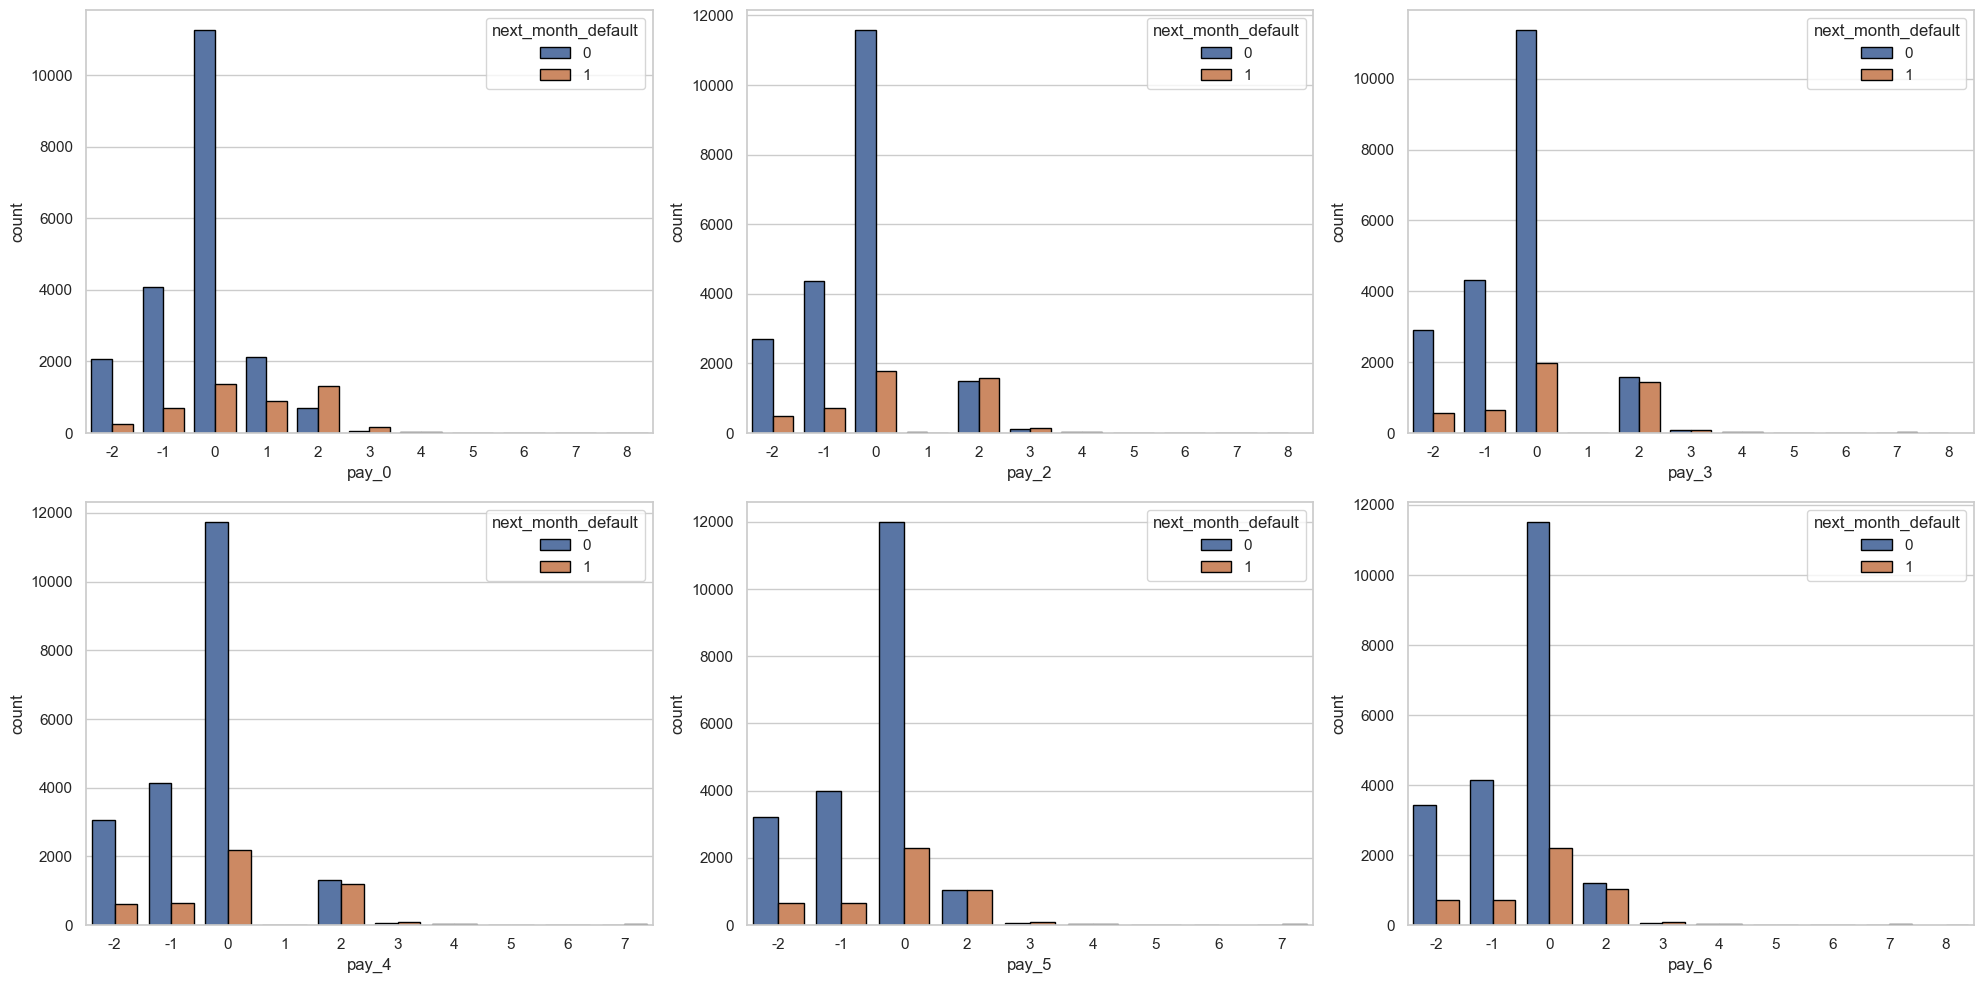

In [72]:
fig = plt.figure(figsize=(20, 10))

                                                                            # again form a 2x3 grid for 6 months
plt.subplot(231)
sns.countplot(x=df.pay_0, hue=df.next_month_default, edgecolor='black')


plt.subplot(232)
sns.countplot(x=df.pay_2, hue=df.next_month_default, edgecolor='black')


plt.subplot(233)
sns.countplot(x=df.pay_3, hue=df.next_month_default, edgecolor='black')


plt.subplot(234)
sns.countplot(x=df.pay_4, hue=df.next_month_default, edgecolor='black')

plt.subplot(235)
sns.countplot(x=df.pay_5, hue=df.next_month_default, edgecolor='black')


plt.subplot(236)
sns.countplot(x=df.pay_6, hue=df.next_month_default, edgecolor='black')


plt.tight_layout()
plt.show()

In [73]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'] 

df['total_payment_delays'] = df[pay_cols].apply(lambda row: np.sum(row >= 1), axis=1)  # calculates for each individual row

In [74]:
# To understand payment delays we must understand the distribution of values >= 0
# 1) general pattern of peak at 0 and and the count of defaulters having values 0 roughly remains same in every month
#    and so is the value 2 in initial 3 months indicating a delayed payment 
# 2) the effect significantly dies at value 3
# 3) value(1) shows very much irregularity.
# 4) a consistent graph for values less than 0 shows on time payment which most of the population follows.
# 5) there is a sudden increase in the proportion of orange bars in relative to blue bars after value(0).

In [75]:
# The number of people who defaulted is much smaller than those who didn’t — evident from the much shorter orange bars.
# This suggests that we will have to go for SMOTE during the making of train,test splits,right before model training.
# This will be done further down in the notebook.

In [76]:
# To understand repayment consistency the graphs of pay_m are not enough so we will create a seperate feature for this 
# we can calculate standard deviation of the pay_m fro eacch individual. 
# Low std → Consistent payer (e.g., always pays on time).
# High std → Inconsistent payer (e.g., pays on time some months, late in others).

In [77]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']   

df['repayment_std'] = df[pay_cols].std(axis=1)   # Compute standard deviation across the pay columns for each row (person)

<Axes: xlabel='repayment_std', ylabel='Density'>

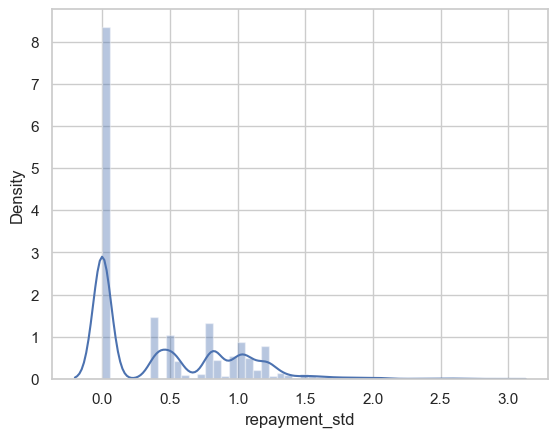

In [78]:
sns.distplot(df['repayment_std'])

In [79]:
# The graph indicates that repayment consistency is high for the majority of customers and 
# the presence of small humps in the tail suggests there are some clusters of moderately inconsistent payers 
# (perhaps fluctuating between pay=0, pay=1, and pay=2).

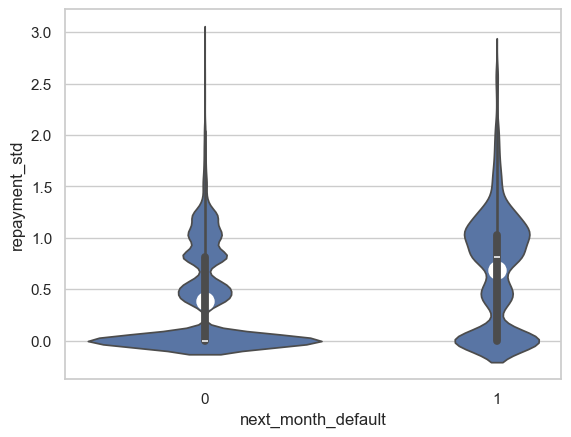

In [80]:
sns.violinplot(x='next_month_default', y='repayment_std', data=df)

group_means = df.groupby('next_month_default')['repayment_std'].mean().values    # calculate the mean to show in plot
plt.scatter([0, 1], group_means, color='white', marker='o', s=150, label='Mean') # For plotting the means as white dots

In [81]:
# We see that means and medians for defaulters is higher indicating that they are inconsistent with there repayment 
# while the population with mean very near to 0 (not defaulter )show consistent payement patterns.

In [82]:
# Now we try to understand utilization of the funds allocated.
# One way to know this is by calculating (AVG_Bill_amt / LIMIT_BAL) 

In [83]:
df['utilization'] = df['AVG_Bill_amt']/df['LIMIT_BAL']           # simple pandas utility for forming new columns

In [84]:
df.utilization.describe()

count    25121.000000
mean         0.370417
std          0.349391
min         -0.200154
25%          0.029783
50%          0.280946
75%          0.681765
max          3.759125
Name: utilization, dtype: float64

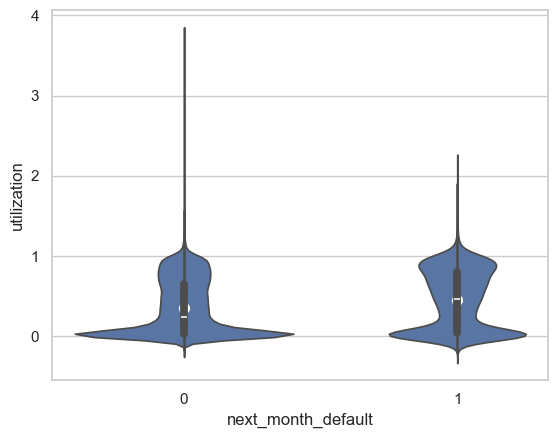

In [85]:
# better visulisation with violinplot

sns.violinplot(x=df.next_month_default, y=df.utilization)
group_means = df.groupby('next_month_default')['utilization'].mean().values   
plt.scatter([0, 1], group_means, color='white', marker='o', s=50, label='Mean')

In [86]:
# We see that utilization(mean and median) is higher for defaulters.
# High utilization (>0.7): Suggests risky financial behavior or financial stress.(Report the values)
# Low utilization (<0.1): Indicates conservative credit use or ample credit lines.
# >1 utilization: Implies the customer consistently exceeds their credit limit, which could be a red flag.
# We can get the number of people havving >1 utilization

len(df[df['utilization'] >1])

513

In [87]:
# We see that the number is considerably less and is mostly shown by non-defaulters, this creates a dilemma whether 
# to remove them or not {this is will be judged further when we train the model and if get low performance.}

In [88]:
# One last feature to construct is the delinquency streaks

In [89]:
# To construct for individual person we will def a function which looks at the pay_m columns and 
# look for values > 0 and add them to get total

In [90]:
def get_delinquency_streak(row):                                          # func for calculating delinquency
    pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
    streak = 0
    max_streak = 0

    for col in pay_cols:
        if row[col] > 0:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak

In [91]:
df["delinquency_streak"] = df.apply(get_delinquency_streak, axis=1)

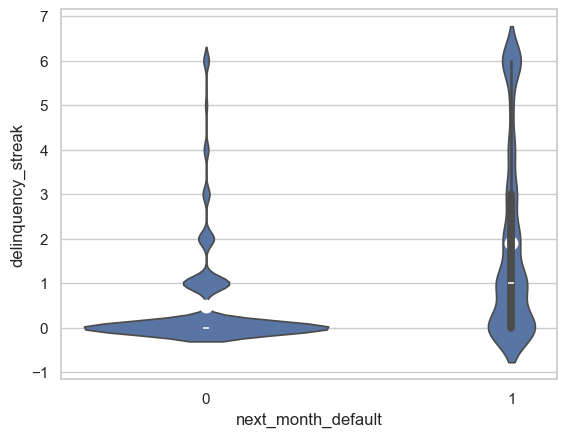

In [92]:
sns.violinplot(x="next_month_default", y="delinquency_streak", data=df)           # violin plot for delinquency_streak
group_means = df.groupby('next_month_default')['delinquency_streak'].mean().values 
plt.scatter([0, 1], group_means, color='white', marker='o', s=80, label='Mean')

In [93]:
# 1) We see that defaulters tend to have longer delinquency streaks than non-defaulters.
# 2) Even though some non-defaulters have streaks, their median streak length is lower compared to defaulters.

In [94]:
# checkpoint / encoding of age_group/ scaling / formation of spilts starts

In [95]:
# We would go for Ordinal encoding as it is most commonly used with age data and better for models like XGBoost and lighGBM.

In [96]:
df['age_group'] = df['age_group'].map({'<30': 0, '30-40': 1, '>40': 2})    # Encoding with the help of map func

In [97]:
from sklearn.model_selection import train_test_split       # importing the libs used for making splits
from sklearn.preprocessing import StandardScaler           # used for scaling 

In [98]:
feature_cols = [col for col in df.columns if col not in ['Customer_ID', 'next_month_default', 'AVG_Bill_amt']] 
                                                                                        # decided to keep all the 
                                                                                        # columns  except avg_bill_amt as corr matrix 
                                                                                        # does not show any promising 
                                                                                        # related features.Will change this
                                                                                        # if low score after tuning.
X = df[feature_cols]                       # initializing the featues and target 
y = df['next_month_default']

In [99]:
# SMOTE is generally applied just when making spilts on X_train but reading online i found that this leads to data leakage 
# so instead i have applied it further down when using RandomSearchCV for hyperparameter tuning.

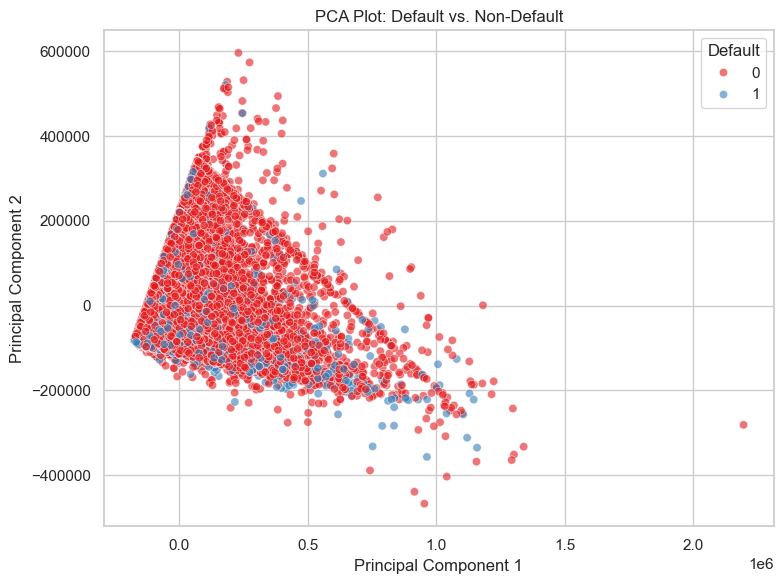

In [100]:
from sklearn.decomposition import PCA            

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)                                         # calculates pca components based on X

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])            # converts them into a DataFrame
pca_df['target'] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set1', alpha=0.6)   # plots the two components
plt.title('PCA Plot: Default vs. Non-Default')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Default')
plt.tight_layout()
plt.show()

In [101]:
# As i had thought there is a significant overlap between PCA components meaning the problem is not linear (red and blue dots). 

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# the test dataset will work like a validation dataset here for hypertuning parameters

In [103]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)                  
X_test_scaled = scaler.transform(X_test)

In [104]:
# Now we will train models like Logistic Regression, Decision Trees,RandomForest,Ensemble Methods (e.g., XGBoost, LightGBM).

In [105]:
from sklearn.linear_model import LogisticRegression       # importing the libraries containing models and metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score,roc_curve, auc # metrics 

In [106]:
models = {                                                                     # Dict conatining all the models 
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "lightGBM": lgb.LGBMClassifier( objective='binary', boosting_type='gbdt', num_leaves=31, learning_rate=0.05, random_state=42)
}

for name, model in models.items():                                       # Train and evaluate
    model.fit(X_train_scaled, y_train)                                          # First i have freely trained all models in a general 
    y_pred = model.predict(X_test_scaled)                                       # setting for having a rough idea about performance
    print(f"\n{name} Results:")                                                 # and then spending time only on the ones that are worth it.
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("F2 Score:\n",fbeta_score(y_test, y_pred, beta=2))


Logistic Regression Results:
Accuracy: 0.8314427860696517
Confusion Matrix:
 [[3906  162]
 [ 685  272]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      4068
           1       0.63      0.28      0.39       957

    accuracy                           0.83      5025
   macro avg       0.74      0.62      0.65      5025
weighted avg       0.81      0.83      0.80      5025

F2 Score:
 0.31909901454716094

Decision Tree Results:
Accuracy: 0.7440796019900497
Confusion Matrix:
 [[3375  693]
 [ 593  364]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      4068
           1       0.34      0.38      0.36       957

    accuracy                           0.74      5025
   macro avg       0.60      0.61      0.60      5025
weighted avg       0.75      0.74      0.75      5025

F2 Score:
 0.3725690890481064

Random Forest Results:
Accuracy:

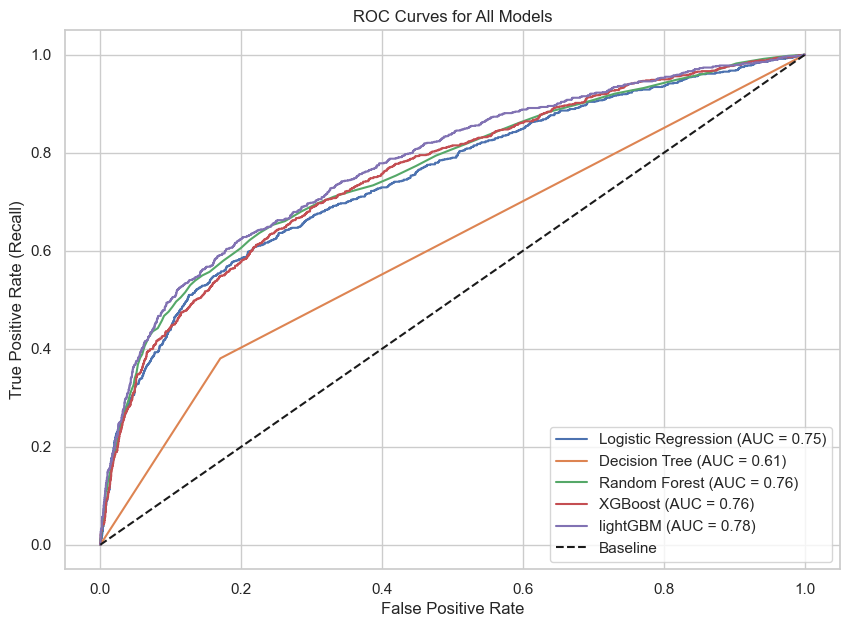

In [107]:
# Now AUC-ROC curves for all 

plt.figure(figsize=(10, 7))

for name, model in models.items():
    try:
        y_probs = model.predict_proba(X_test_scaled)[:, 1]                       # predicting the probabilities of default
    except:
        y_probs = model.decision_function(X_test_scaled)                         # fallback for the models that use decision_function

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Baseline")                         # Plot diagonal line depicting a baseline

plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [108]:
X_train.shape

(20096, 29)

In [109]:
# We see that lightgbm, logistic Regression, Random Forest and XGBoost 
# have more area under the curve depicting a higher performance.

[LightGBM] [Info] Number of positive: 3827, number of negative: 16269
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3860
[LightGBM] [Info] Number of data points in the train set: 20096, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.190436 -> initscore=-1.447180
[LightGBM] [Info] Start training from score -1.447180
[LightGBM] [Info] Number of positive: 2551, number of negative: 10846
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3846
[LightGBM] [Info] Number of data points in the train set: 13397, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.190416 -> initscore=-1.447311
[LightGBM] [Info] Start training from score -1.447311
[LightGBM] [In

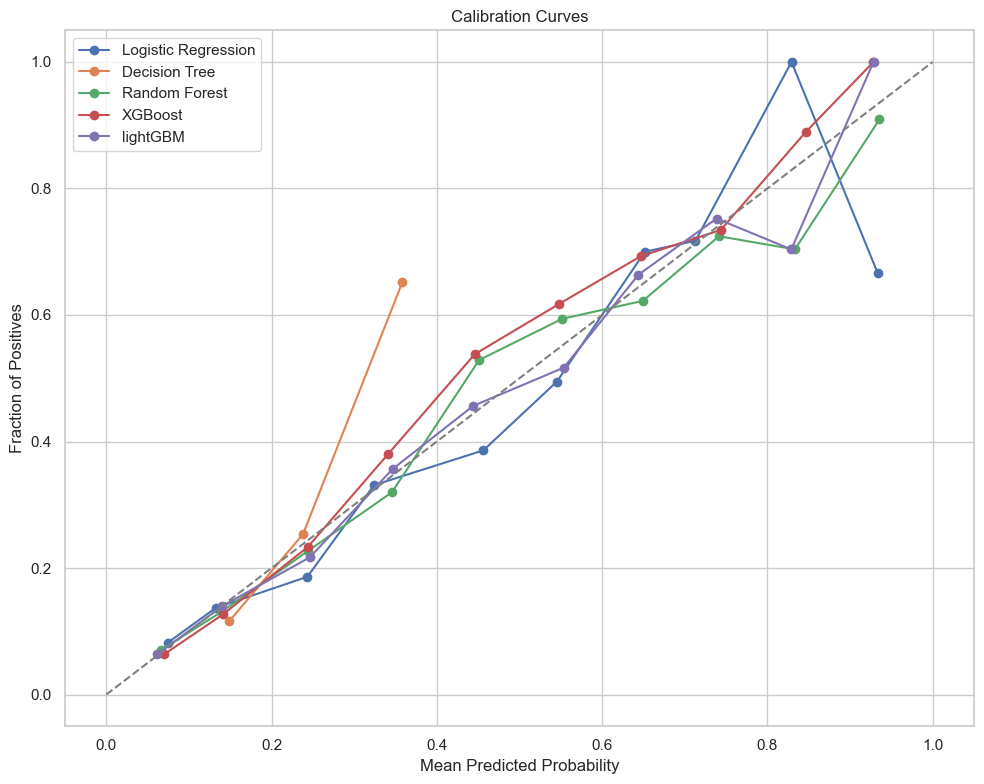

In [110]:
from sklearn.calibration import calibration_curve            # Libs for calibration curve, it shows the performance of 
from sklearn.calibration import CalibratedClassifierCV       # models at different probabilities

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    calibrated = CalibratedClassifierCV(estimator=model, method='isotonic', cv=3)    # Calibrating the model first
    calibrated.fit(X_train_scaled, y_train)
    
    prob_pos = calibrated.predict_proba(X_test_scaled)[:, 1]                         # probabilities

    prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)            # Get calibration curve

    # Plot
    plt.plot(prob_pred, prob_true, marker='o', label=f'{name}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')                               # curve representing perfectly calibrated model
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [111]:
# The calibration curve shows that lightGBM, RandomForest and XGBoost predicts very well at most of probablities.

In [112]:
# Based on all the evalution metrics till now i decided to for hyperparameter tuning of LightGBM, XGBoost and Random Forest.

[LightGBM] [Info] Number of positive: 3827, number of negative: 16269
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3860
[LightGBM] [Info] Number of data points in the train set: 20096, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.190436 -> initscore=-1.447180
[LightGBM] [Info] Start training from score -1.447180


<function matplotlib.pyplot.show(close=None, block=None)>

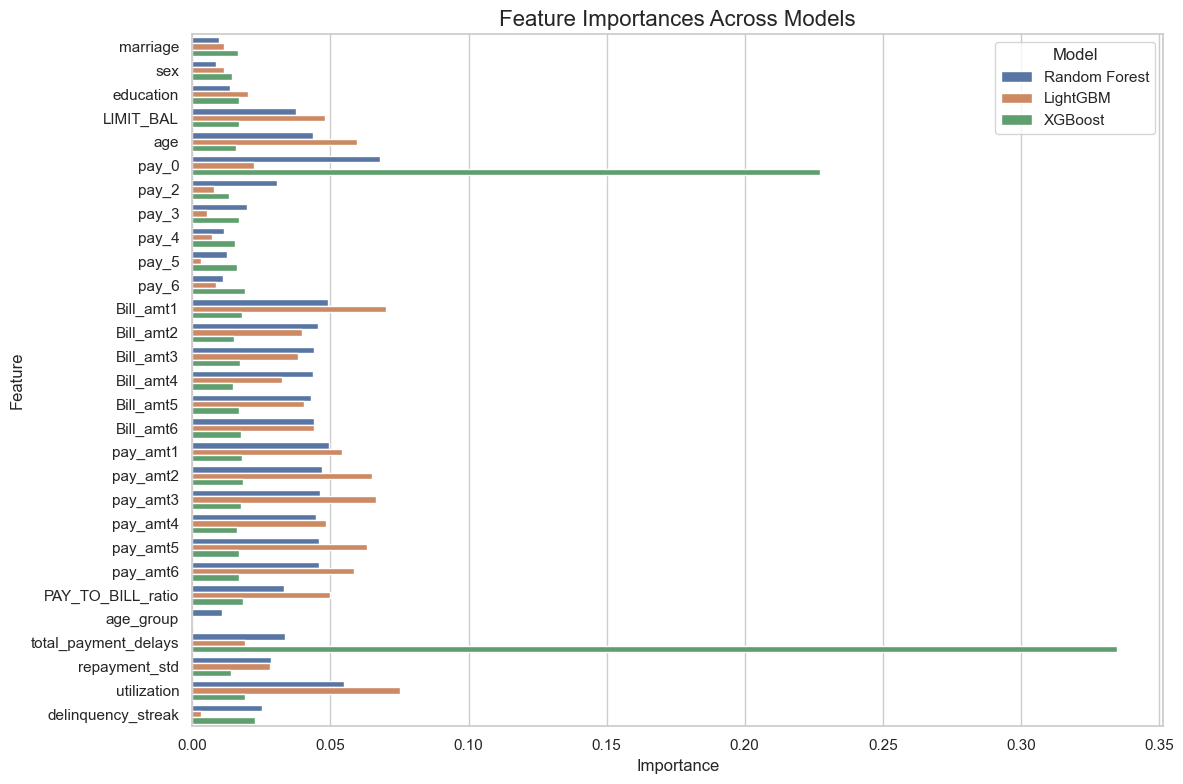

In [113]:
X_train_df = pd.DataFrame(X_train_scaled, columns=[                                 # Remaking X_train as due to scaling it has become
    'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',                             # a numpy array and will not work.
    'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 
    'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
    'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
    'PAY_TO_BILL_ratio', 'age_group', 'total_payment_delays',
    'repayment_std', 'utilization', 'delinquency_streak'
])

X_test_df = pd.DataFrame(X_test_scaled, columns=[                                   # Remaking X_test 
    'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',                           
    'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 
    'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
    'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
    'PAY_TO_BILL_ratio', 'age_group', 'total_payment_delays',
    'repayment_std', 'utilization', 'delinquency_streak'
])

rf = RandomForestClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(objective='binary', random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

rf.fit(X_train_df, y_train)
lgbm.fit(X_train_df, y_train)
xgb.fit(X_train_df, y_train)
 

rf_importance = rf.feature_importances_                                             # Extracting the imporatances
lgb_importance = lgbm.feature_importances_
xgb_importance = xgb.feature_importances_

lgb_importance_norm = lgb_importance / lgb_importance.sum()                         # lightGBM gives very large importances 
xgb_importance_norm = xgb_importance / xgb_importance.sum()                         # this leads to formation of a very bad plot
rf_importance_norm = rf_importance / rf_importance.sum()                             # so this scales the values of all models.

importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Random Forest': rf_importance_norm,
    'LightGBM': lgb_importance_norm,
    'XGBoost': xgb_importance_norm
})


plot_df = importance_df.melt(id_vars='Feature', var_name='Model', value_name='Importance')   # For converting wide→long format for seaborn

plt.figure(figsize=(12, 8))                                                                  # plotting the importances 
sns.barplot(data=plot_df, y='Feature', x='Importance', hue='Model')
plt.title("Feature Importances Across Models", fontsize=16)
plt.tight_layout()
plt.show

In [114]:
# We see that the importance of total_payment_delays for XGBoost and other makes it of tremendous importance.

In [115]:
# I had first gone for SHAP but it was not very informative and computationally heavy and time consuming so used 
# feature_importances_.

In [116]:
# These were some general results now we will try to improve the models by tuning the hyperparamers.

In [117]:
# For this we can go for techniques like GridSearchCV and RandomSearchCV which are great at hyperparameter tuning
# and cross validation.
# We’ll use RandomizedSearchCV because it’s faster than GridSearch for large parameter spaces.
# Since F2 is a important criteria as we are interested in detecting the true defaulters we will hypertune the models around it.

In [118]:
from sklearn.metrics import make_scorer # it wraps any scoring function into a format that GridSearchCV or cross_val_score can use.
from sklearn.model_selection import RandomizedSearchCV

In [119]:
f2_scorer = make_scorer(fbeta_score, beta=2)                           # wraps the function so that F2 can be used by randomsearchCV

In [120]:
RandomForest_grid = {                                                  # hyperparameters for Random Forest
    'clf__n_estimators': [100, 200, 300, 500],                         # More trees generally improve performance and reduce variance,
    'clf__min_samples_split': [2, 5, 10],                              # but increase compute time. 100–500 is a practical range for large datasets.
    'clf__max_depth': [5, 10, 20, None],                               # Shallower trees reduce overfitting. None lets trees grow fully to capture 
    'clf__max_features': ['sqrt', 'log2', None],                       # complex patterns; lower depths help generalize.
    'clf__max_features': ['sqrt', 'log2', None],                       
    'clf__bootstrap': [True, False],
    'clf__class_weight': ['balanced', 'balanced_subsample']            # Helps handle class imbalance by adjusting weights inversely proportional 
}                                                                      # to class frequencies

lightgbm_grid = {                                                     # hyperparameters for Random Forest
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [5, 10, -1],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__num_leaves': [15, 31, 63],                                  # Controls tree complexity; more leaves = more granularity but higher 
    'clf__subsample': [0.6, 0.8, 1.0],                                # overfitting risk.Business-wise, small leaf counts yield simpler trees.
    'clf__colsample_bytree': [0.6, 0.8, 1.0]                          # Add regularization by using random subsets of data and features. 
}

XGBoost_grid = {                                                      # hyperparameters for XGBoost
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.7, 0.8],
    'model__colsample_bytree': [0.6, 0.8],
    'model__scale_pos_weight': [1, 3, 5, 7]                            
}

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline   # For applying SMOTE in RandomsearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [122]:
# The stratified CV ensures that the models are given data with similar configuration of the original 
# target variable distribution. And I will go for AUC-ROC and F2 for choosing the best model which will be used for prediction. 

In [123]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, roc_auc_score # libs for generating graph

In [124]:
scoring = {                                # this will be used for optimizing and evaluate models
    'accuracy': 'accuracy',
    'precision': 'precision',
    'f1': 'f1',
    'f2': f2_scorer,                                
    'roc_auc': 'roc_auc'
}

In [125]:
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])


random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=RandomForest_grid,
    n_iter=30,                                         # governs the number of folds and fits               
    scoring=scoring,
    refit='f2',                                        # Optimizes for F2 to seelct best model if a clash appears
    cv=stratified_cv,
    verbose=2,                                     
    random_state=42,                                   # adds randomness 
    n_jobs=-1                                          # governs the  number of cores of CPU to use
)


random_search.fit(X_train_scaled, y_train)

print("Best Parameters:\n", random_search.best_params_)       # printing the result and metrics
print("\nBest F2 Score:\n", random_search.best_score_)


y_pred = random_search.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred, digits=4))

y_probs = random_search.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters:
 {'clf__n_estimators': 500, 'clf__min_samples_split': 2, 'clf__max_features': 'log2', 'clf__max_depth': 5, 'clf__class_weight': 'balanced_subsample', 'clf__bootstrap': False}

Best F2 Score:
 0.5633034450226688
Confusion Matrix:
 [[3186  882]
 [ 364  593]]

Classification Report on Test Set:
              precision    recall  f1-score   support

           0     0.8975    0.7832    0.8364      4068
           1     0.4020    0.6196    0.4877       957

    accuracy                         0.7520      5025
   macro avg     0.6497    0.7014    0.6621      5025
weighted avg     0.8031    0.7520    0.7700      5025

ROC AUC Score: 0.7655


In [126]:
# The ImbPipeline is used for handling imbalanced dataset, they form workflows for easier application.

In [127]:
pipe = ImbPipeline([                                                     # same procedure for lightGBM as above
    ('smote', SMOTE(random_state=42)),
    ('clf', lgb.LGBMClassifier(objective='binary', random_state=42))
])

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=lightgbm_grid,
    scoring=scoring,
    refit='f2',
    n_iter=30,
    cv=stratified_cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


search.fit(X_train_scaled, y_train)

print("Best Parameters:\n", search.best_params_)
print("\nBest F2 Score:\n", search.best_score_)

y_pred = search.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred, digits=4))

y_probs = search.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 16269, number of negative: 16269
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7241
[LightGBM] [Info] Number of data points in the train set: 32538, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters:
 {'clf__subsample': 1.0, 'clf__num_leaves': 15, 'clf__n_estimators': 100, 'clf__max_depth': 10, 'clf__learning_rate': 0.01, 'clf__colsample_bytree': 1.0}

Best F2 Score:
 0.5390962687770262
Confusion Matrix:
 [[3347  721]
 [ 397  560]]

Classification Report on Test Set:
              precision    recall  f1-score   support

           0     0.8940    0.8228    0.8569      4068
           1     0.4372    0.5852    0.5004       957

    accuracy                         0.7775   

In [128]:
pipe = ImbPipeline([                                                      # same procedure for XGBoost as above
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        use_label_encoder=False, 
        eval_metric='logloss', 
        random_state=42
    ))
])

XGBsearch = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=XGBoost_grid,
    scoring=scoring,
    refit='f2',
    n_iter=30,
    cv=stratified_cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

XGBsearch.fit(X_train_scaled, y_train)

print("Best Parameters:\n", XGBsearch.best_params_)
print("\nBest F2 Score:\n", XGBsearch.best_score_)

y_pred = XGBsearch.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred, digits=4))

y_probs = XGBsearch.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters:
 {'model__subsample': 0.8, 'model__scale_pos_weight': 3, 'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.6}

Best F2 Score:
 0.5924466356267326
Confusion Matrix:
 [[1469 2599]
 [ 104  853]]

Classification Report on Test Set:
              precision    recall  f1-score   support

           0     0.9339    0.3611    0.5208      4068
           1     0.2471    0.8913    0.3869       957

    accuracy                         0.4621      5025
   macro avg     0.5905    0.6262    0.4539      5025
weighted avg     0.8031    0.4621    0.4953      5025

ROC AUC Score: 0.7671


In [129]:
# We see that XGBoost has higher F2 score and a very strong Recall for defaulters while balancing precision
# and in the case of credit default prediction where it is more important to catch a defaulter than flagging a non 
# defaulter we should go for threshold tuning for just the XGBoost model.

In [130]:
# But first lets look at the prediction features XGBoost is most concerned with.

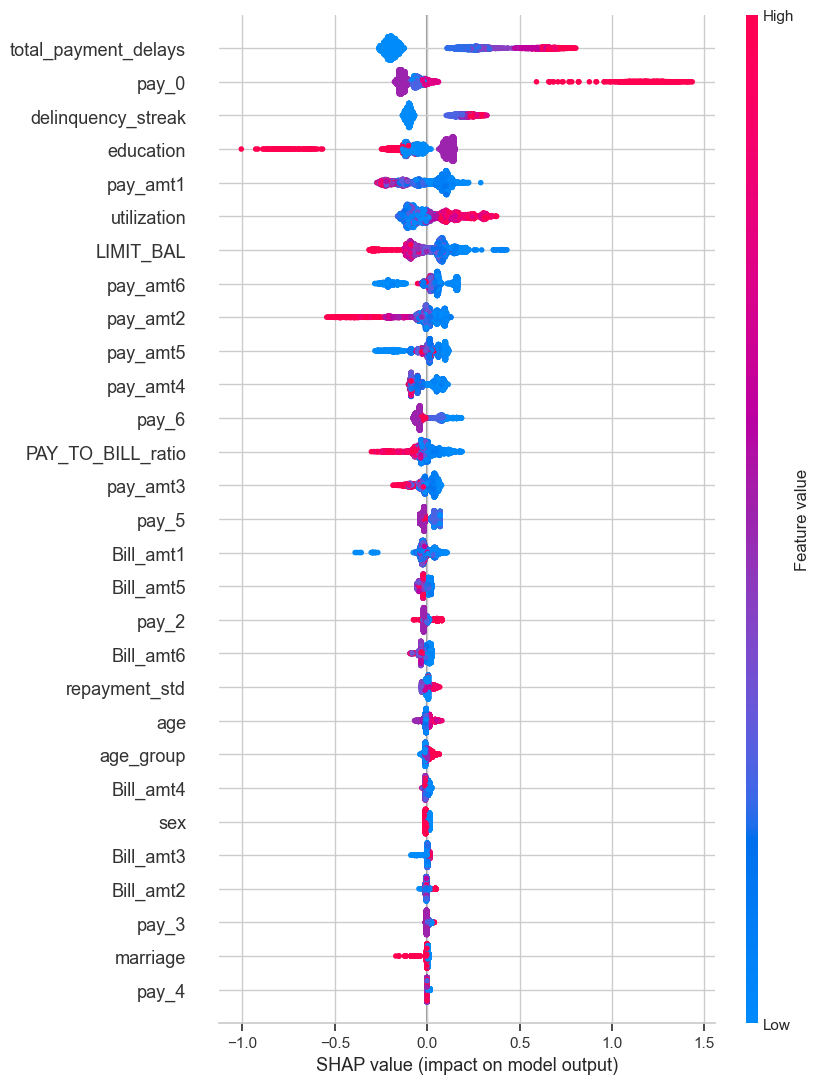

In [131]:
import shap                                                          # importing SHAP

xgb_model = XGBsearch.best_estimator_.named_steps['model']           # extracting the best model from RandomizedSearchCV

explainer_data = X_test_df

explainer = shap.Explainer(xgb_model, X_test_df)                     # creating SHAP explainer
shap_values = explainer(explainer_data, check_additivity=False)      # SHAP values, additivity is set to false as it gives error

shap.plots.beeswarm(shap_values, max_display=30)                     # Beeswarm plot for the values

In [132]:
# We see that total_payment_delay,pay_0 and utilization are main drivers for output while education works negatively. 

In [133]:
# Now we tune the threshold for maximising recall and maintaining reasonable precision.

Best Threshold (F2-based): 0.5531
F2 Score: 0.5933
Precision: 0.2741
Recall: 0.8370
ROC AUC Score: 0.7671


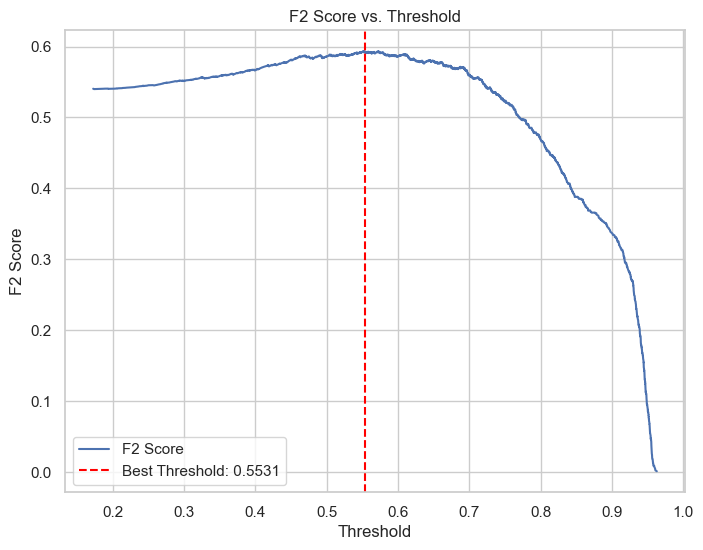

In [134]:
y_probs = XGBsearch.predict_proba(X_test_scaled)[:, 1]                        # extracting probs

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)     # Generating precision, recall, thresholds

f2_scores = [fbeta_score(y_test, y_probs >= t, beta=2) for t in thresholds]   # calculating F2 scores at each threshold


best_index = np.argmax(f2_scores)                                             # best threshold
best_threshold = thresholds[best_index]

y_pred_best = (y_probs >= best_threshold).astype(int)                         # Final predictions based on threshold

final_f2 = fbeta_score(y_test, y_pred_best, beta=2)
final_precision = precision_score(y_test, y_pred_best)                        # Final metrics 
final_recall = recall_score(y_test, y_pred_best)
final_auc = roc_auc_score(y_test, y_probs)

print(f"Best Threshold (F2-based): {best_threshold:.4f}")
print(f"F2 Score: {final_f2:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"ROC AUC Score: {final_auc:.4f}")


plt.figure(figsize=(8, 6))                                                   # Plotting F2 vs threshold
plt.plot(thresholds, f2_scores, label='F2 Score')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold: {best_threshold:.4f}')
plt.xlabel('Threshold')
plt.ylabel('F2 Score')
plt.title('F2 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [135]:
# Now We start Working on the Real Test set on which we have to give the predications
# XGBoost will be used with tuned thresholds as the model rest all like the original dataset.

In [136]:
test = pd.read_csv('validate_dataset_final.csv')             # loading the test dataset

In [137]:
test.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


In [138]:
# We Remove the anamolies of marriage and education

In [139]:
len(test[test['marriage']==0])  

9

In [140]:
test.loc[(test['marriage'] == 0), "marriage"] = 3

In [141]:
len(test[test["education"] >4]) 

64

In [142]:
test.loc[(test['education'] > 4) | (test['education'] == 0), "education"] = 4

In [143]:
# We make the same features 
# age_group,total_payment_delays, repayment_std, utilization and deliquency_streak

In [144]:
test['age_group'] = test.apply(age_bin, axis=1)     

In [145]:
test['total_payment_delays'] = test[pay_cols].apply(lambda row: np.sum(row >= 1), axis=1)

In [146]:
test['repayment_std'] = test[pay_cols].std(axis=1)   

In [147]:
test['utilization'] = test['AVG_Bill_amt']/test['LIMIT_BAL']
test["delinquency_streak"] = test.apply(get_delinquency_streak, axis=1)

In [148]:
# Now the encoding part of age_groups and removing the customers id column

In [149]:
test['age_group'] = test['age_group'].map({'<30': 0, '30-40': 1, '>40': 2})

In [150]:
test_1 = test.drop(['Customer_ID','AVG_Bill_amt'],axis=1)              # dropping unnesecary columns

In [151]:
# Now scaling the test dataset
test_scaled = scaler.transform(test_1)  

In [152]:
test_1.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'PAY_TO_BILL_ratio', 'age_group', 'total_payment_delays',
       'repayment_std', 'utilization', 'delinquency_streak'],
      dtype='object')

In [153]:
y_probs = XGBsearch.predict_proba(test_scaled)[:, 1]  
y_pred_final = (y_probs >= 0.5531).astype(int)                          # Applying the threshold on probabilities

In [154]:
submission = pd.DataFrame({'Customer_ID': test['Customer_ID'], 'next_month_default( 0 or 1 )': y_pred_final})    # making the submission file

In [155]:
submission.head()

,Customer_ID,next_month_default( 0 or 1 )
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [156]:
submission.describe()

,Customer_ID,next_month_default( 0 or 1 )
count,5016.000000,5016.000000
mean,2508.500000,0.594099
std,1448.138806,0.491115
min,1.000000,0.000000
25%,1254.750000,0.000000
50%,2508.500000,1.000000
75%,3762.250000,1.000000
max,5016.000000,1.000000


In [157]:
submission['next_month_default( 0 or 1 )'].value_counts()              # checking the distribution

next_month_default( 0 or 1 )
1    2980
0    2036
Name: count, dtype: int64

In [158]:
submission.to_csv('submission_23410034.csv', index=False)              # exporting the file